#                                                            
                                            KINGSLEY JOLLY JACKSON 
                           NEXUS BANK - CUSTOMER SEGMENTATION AND DEPOSIT DETECTION SYSTEM PROJECT 2023

## Introduction:

Nexus Bank is a financial institution dedicated to delivering unparalleled banking services to our clients. 
Our mission is to establish enduring relationships with our customers by providing tailored financial solutions that align with their individual needs and goals. 
At Nexus Bank, we believe that every individual deserves access to world-class financial products and services, regardless of their age, profession, or income level. That's why we offer a wide spectrum of banking solutions to accommodate your lifestyle, including term deposits, personal loans, and mortgage financing. Our team of seasoned banking professionals is committed to providing you with the utmost level of service, transparency, and honesty.


## Objective:
Nexus bank has conducted campaigns with the goal of acquiring deposits. The directors were unsatisfied with their current situation and need to optimize the operations at Nexus bank. 

Leverage the on data to gain insights into the bank and improve efficiency and identify patterns , trends in customer behaviour to decipher if customer demographics such as age, educational level etc. influences customer’s attitude toward defaulting. 

Predict future customer behaviour and know the likelihood of deposits from customers. Understand how effective the bank campaigns are and thus develop marketing campaigns to reach specific customer segments. 

Analyse customer behaviours, loan trends, and marketing campaign effectiveness, Nexus wants to optimize its operations, mitigate risks/ loan defaults, and improve customer deposits.


## 1.  Import Libraries And Dataset For Exploration

In [1]:
#Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import silhouette_score,homogeneity_score

import warnings
warnings.filterwarnings ('ignore')

# 2. Exploratory Data Analysis

In [2]:
#Load the dataset from csv file to a pandas dataframe

df=pd.read_csv ("C:/Users/CDL-KINGSLEY\Desktop/10alytics Class work/Data Captone Project/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Data Shape
df.shape

(45211, 17)

In [4]:
#Data Description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'failure' 'other' 'success']
deposit
['no' 'yes']


##### Data Cleaning And Preprocessing

In [7]:
#Check for Duplicate

print (df.duplicated().sum())

0


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


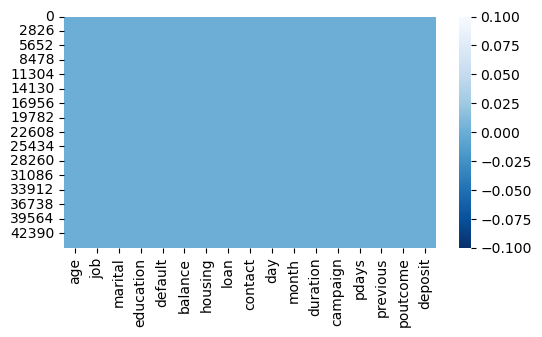

In [8]:
#Checking missing values
print (df.isnull().sum())

#Visualizing the missing data


plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r');

In [9]:
#Investigate Features with one value
for columns in df.columns:
    print (columns,df[columns].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
deposit 2


In [10]:
cat_features = [col for col in df.select_dtypes(include='object').columns if col != 'deposit']
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
for col in cat_features:
    print ('The col is {} and number of categories are {}'.format(col,len (df[col].unique())) )

The col is job and number of categories are 12
The col is marital and number of categories are 3
The col is education and number of categories are 4
The col is default and number of categories are 2
The col is housing and number of categories are 2
The col is loan and number of categories are 2
The col is contact and number of categories are 3
The col is month and number of categories are 12
The col is poutcome and number of categories are 4


######  Observation
We have 9 categorical data with job and month dominating with the highest values 

### a. Univariate Analysis

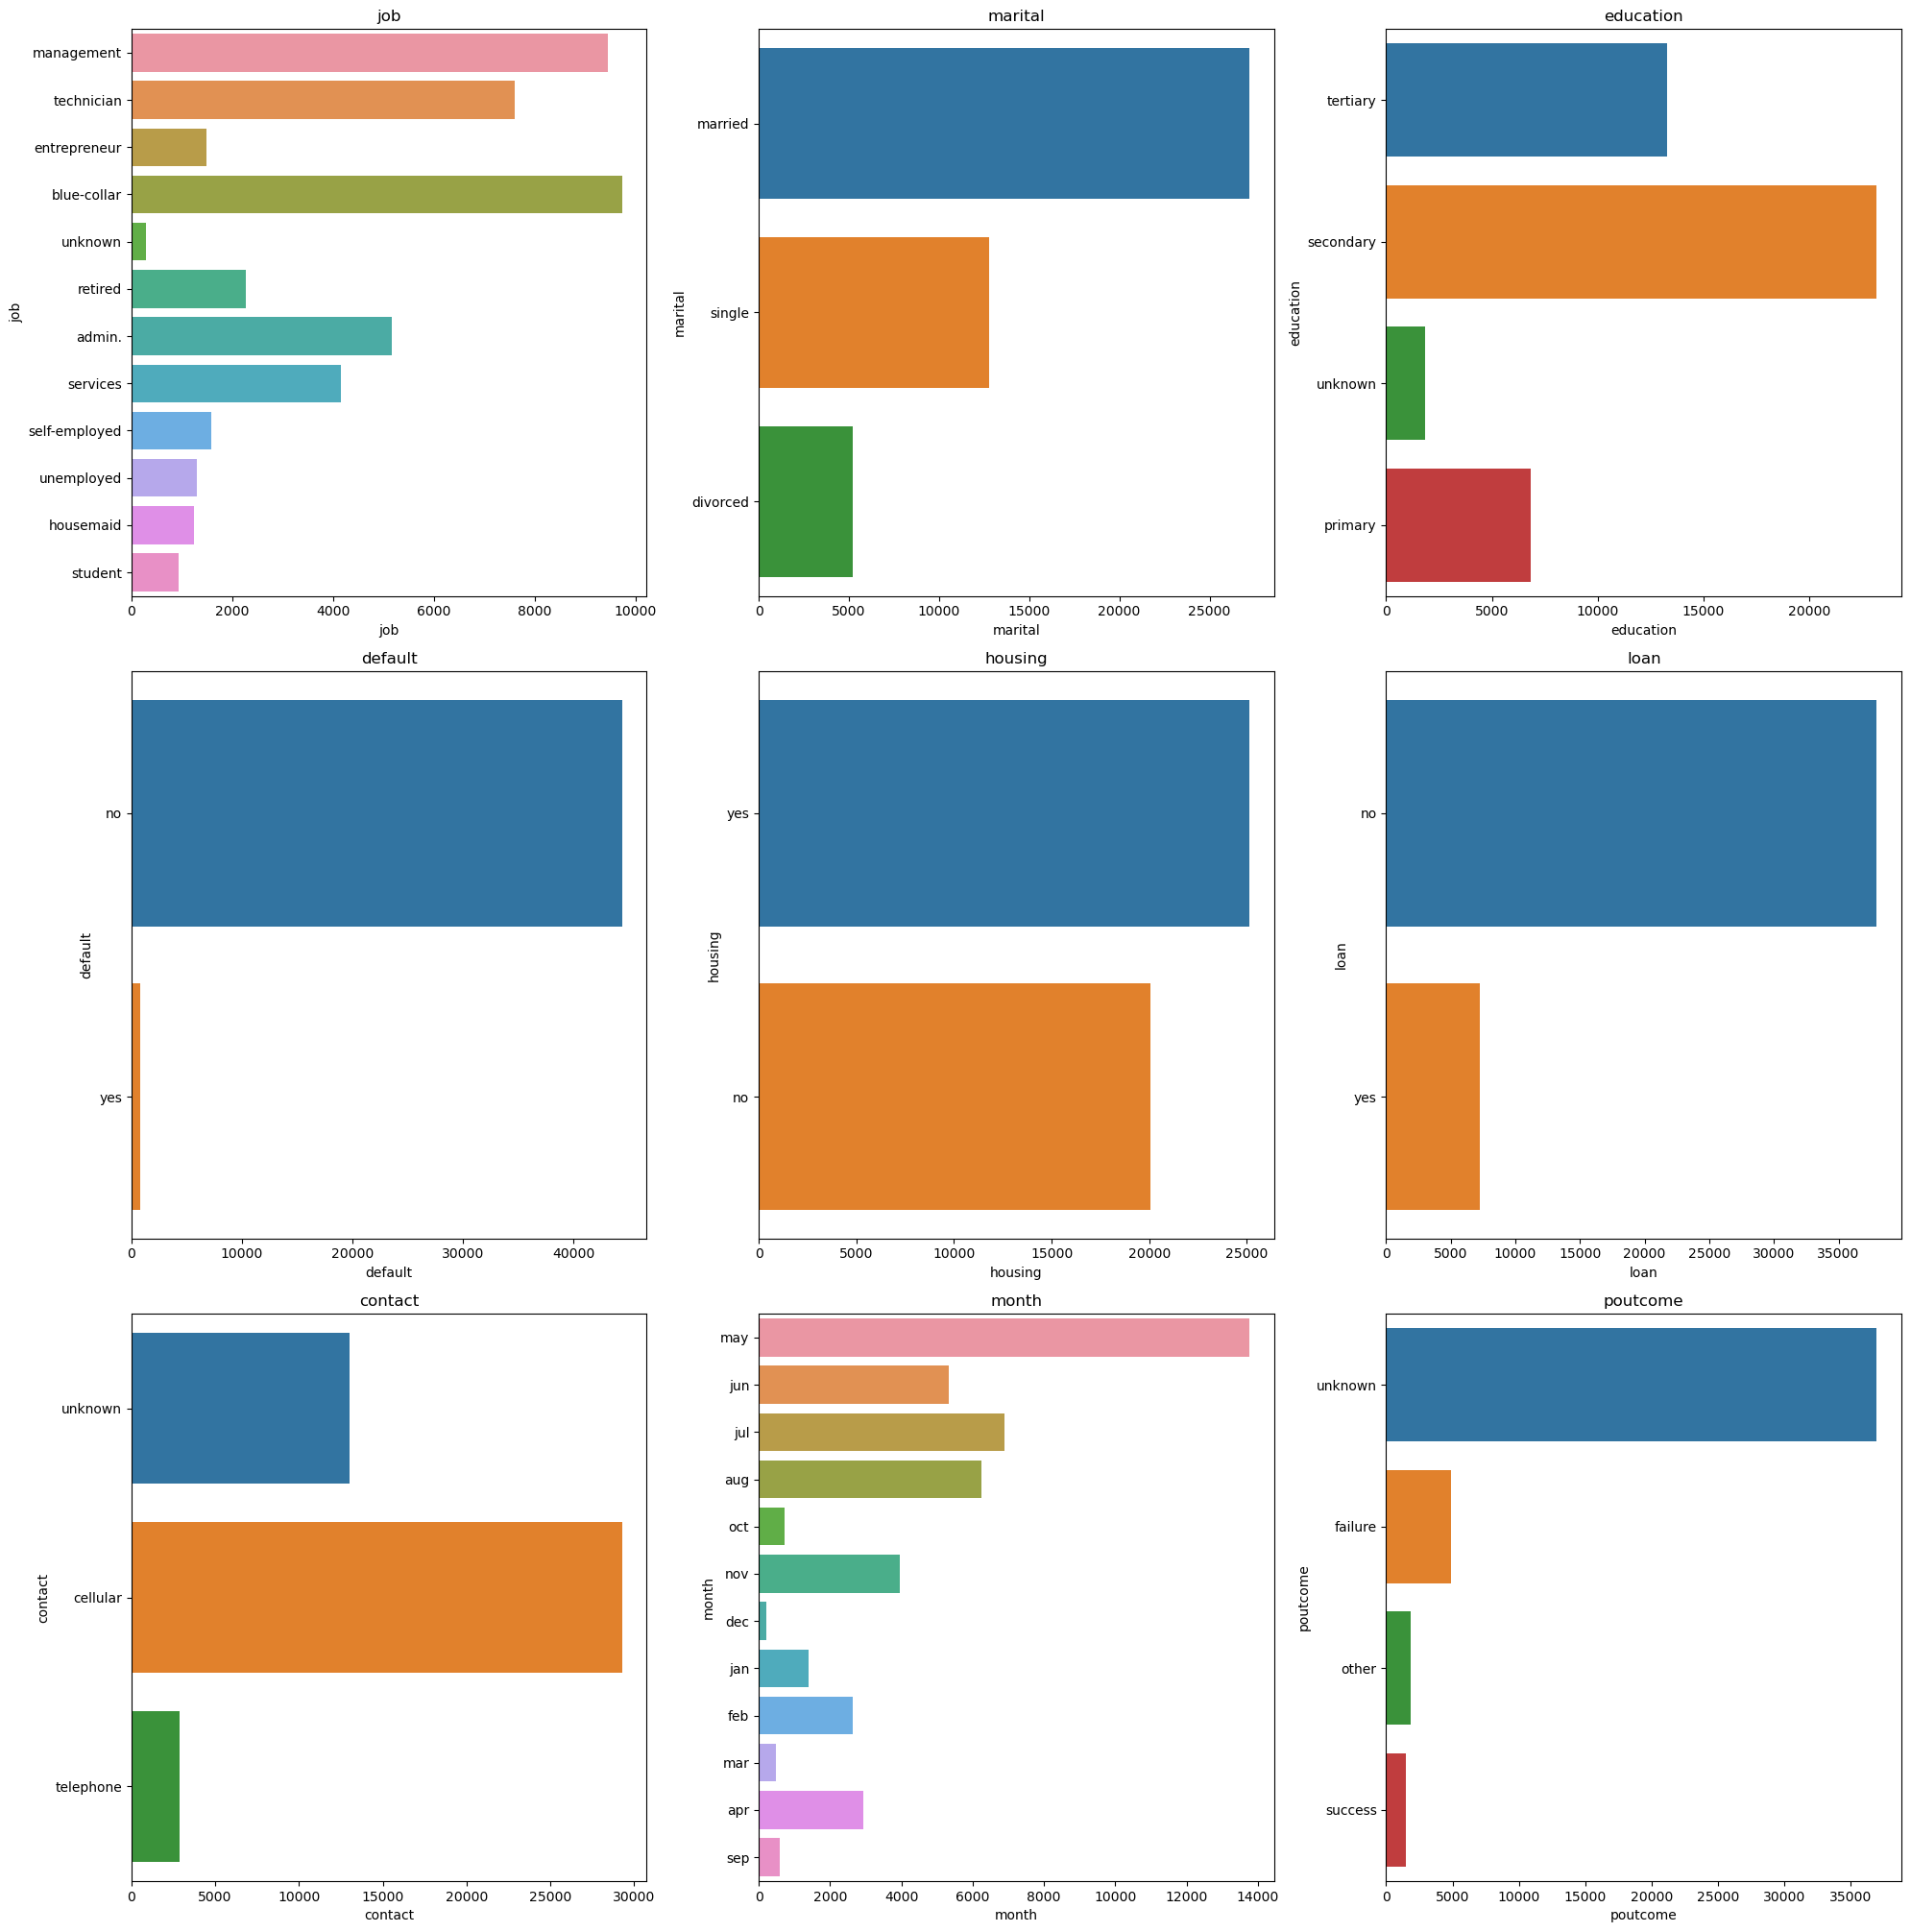

In [12]:
#find the categorical data distribution using count plot

plt.figure(figsize=(20, 80), facecolor='white')
plotnumber = 1

for cat_feature in cat_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.countplot(y=cat_feature, data=df)
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

##### Observation

* Customers with job type as management and blue-collar records are high in the given dataset and house are less
* Married customers are high and divorced are less
* The dataset shows customers with secondary educational background are higher
* Default from the dataset does not play any significant role as it as shows number of 'no'' in high ratio compared to the number of 'yes'
* Monthly distribution in the data shows that May contributed high number while Dec shows lesser contribution


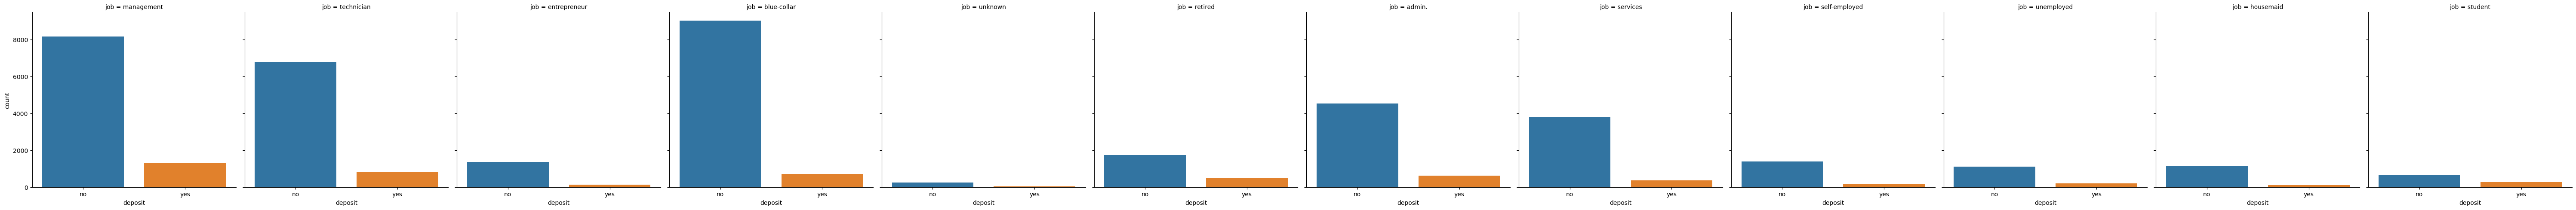

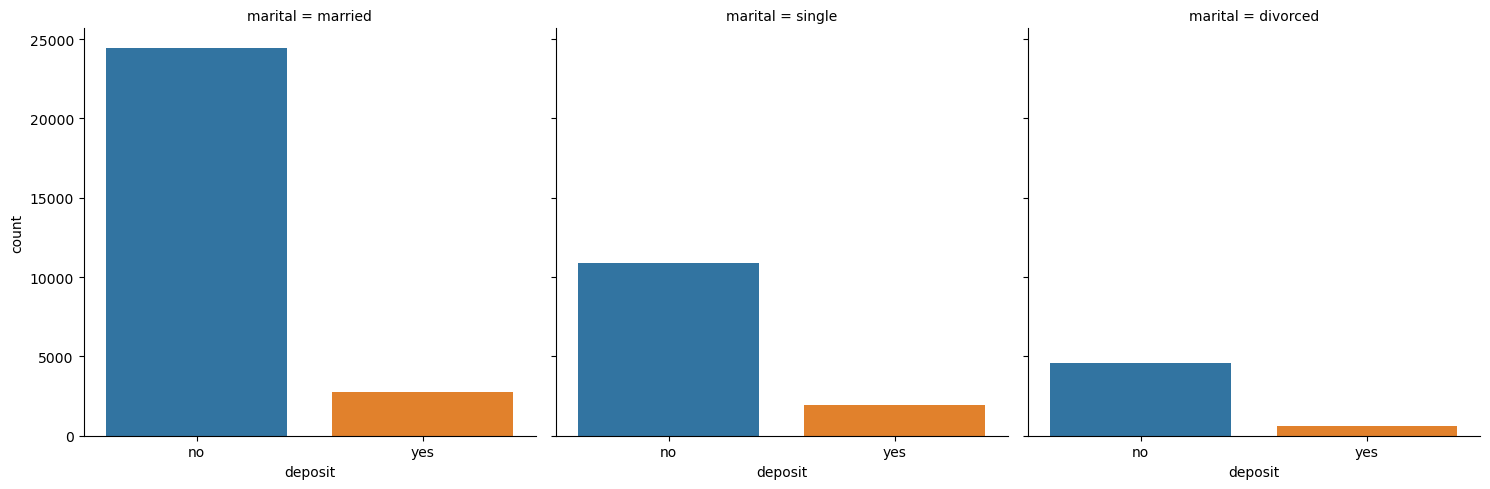

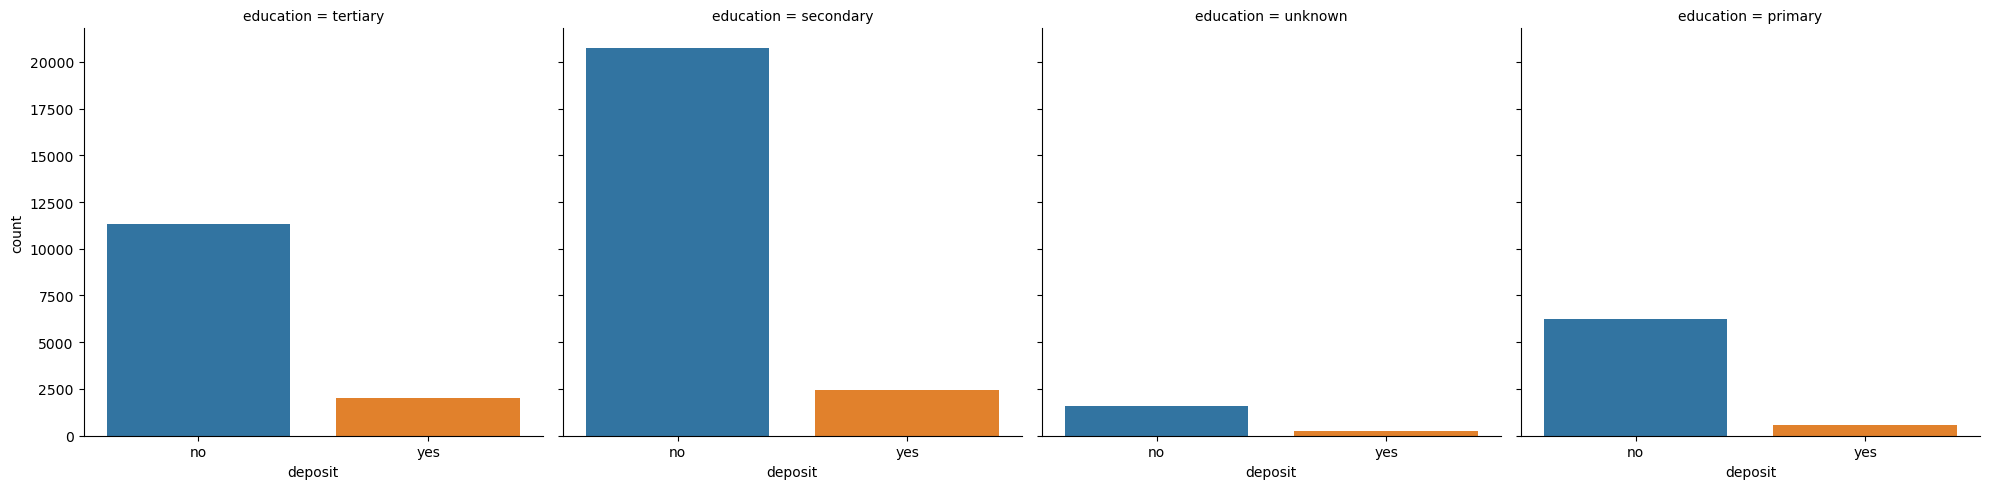

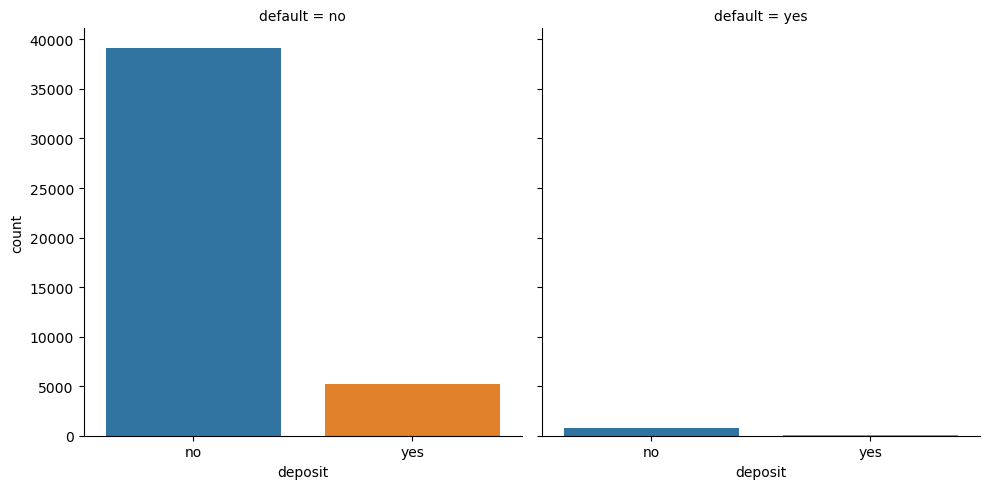

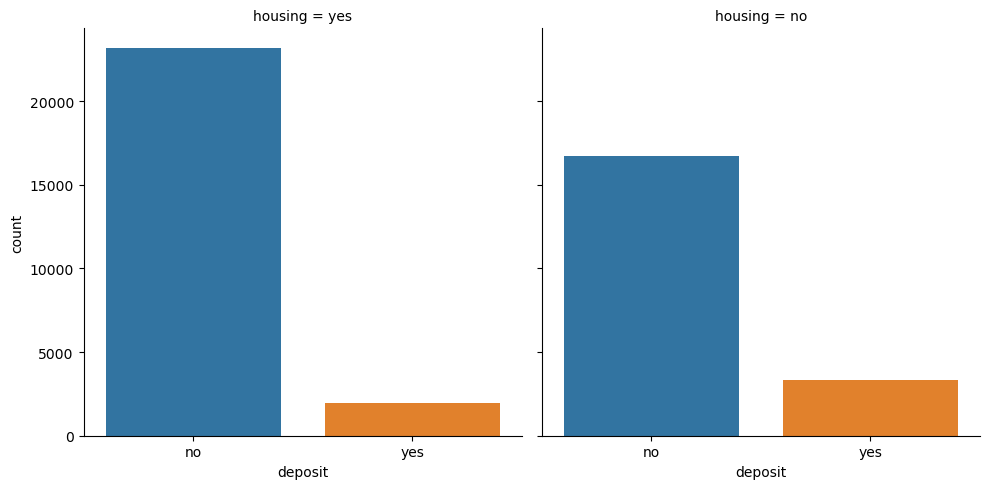

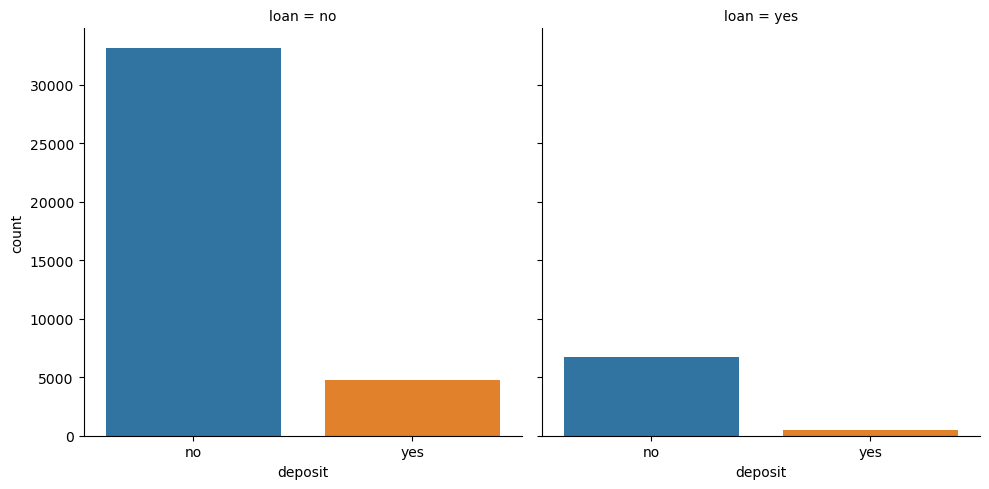

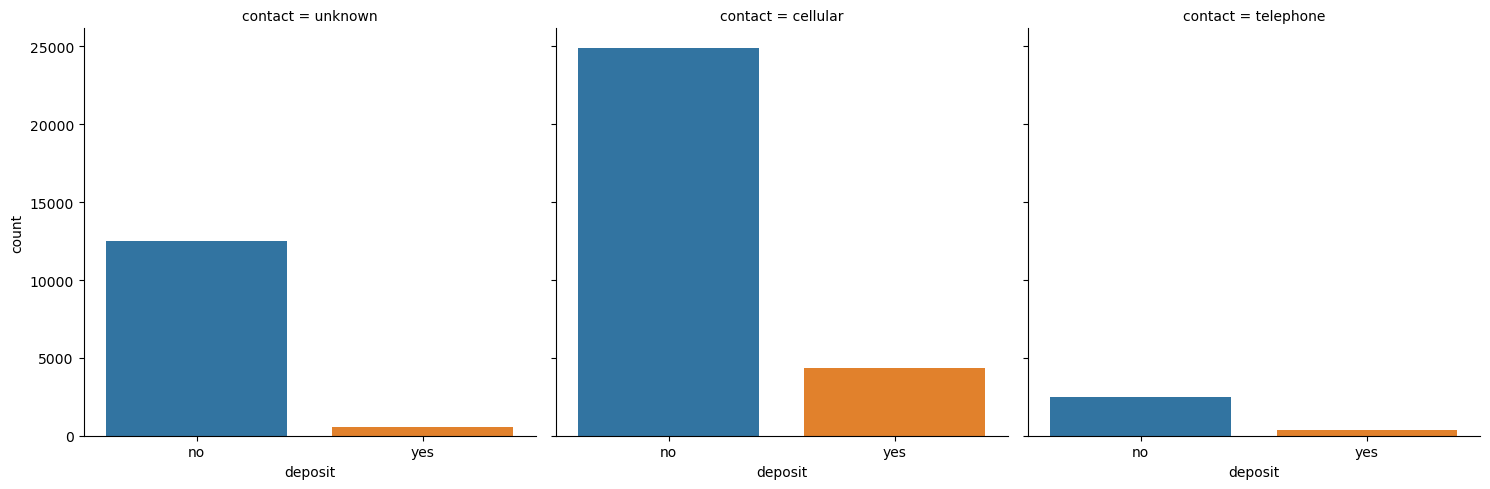

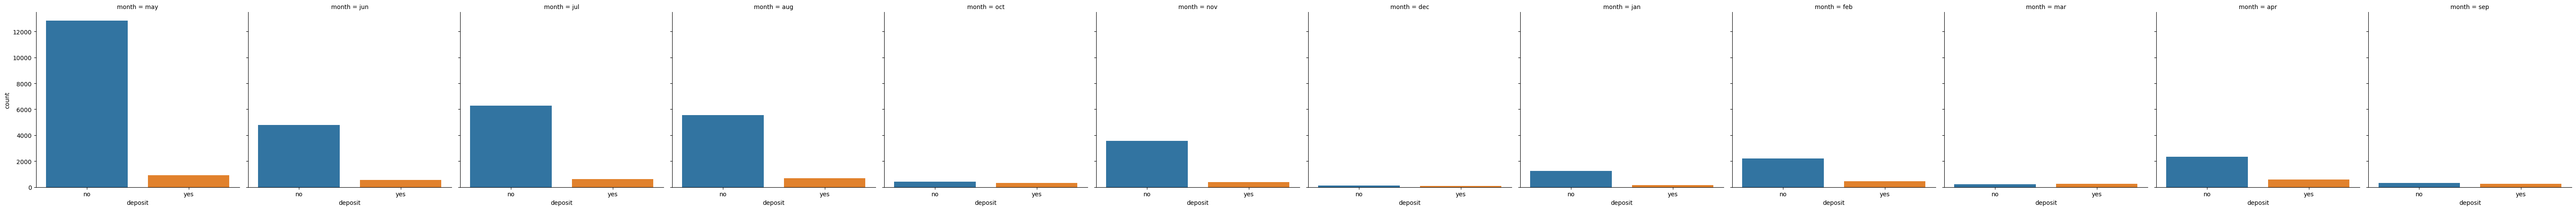

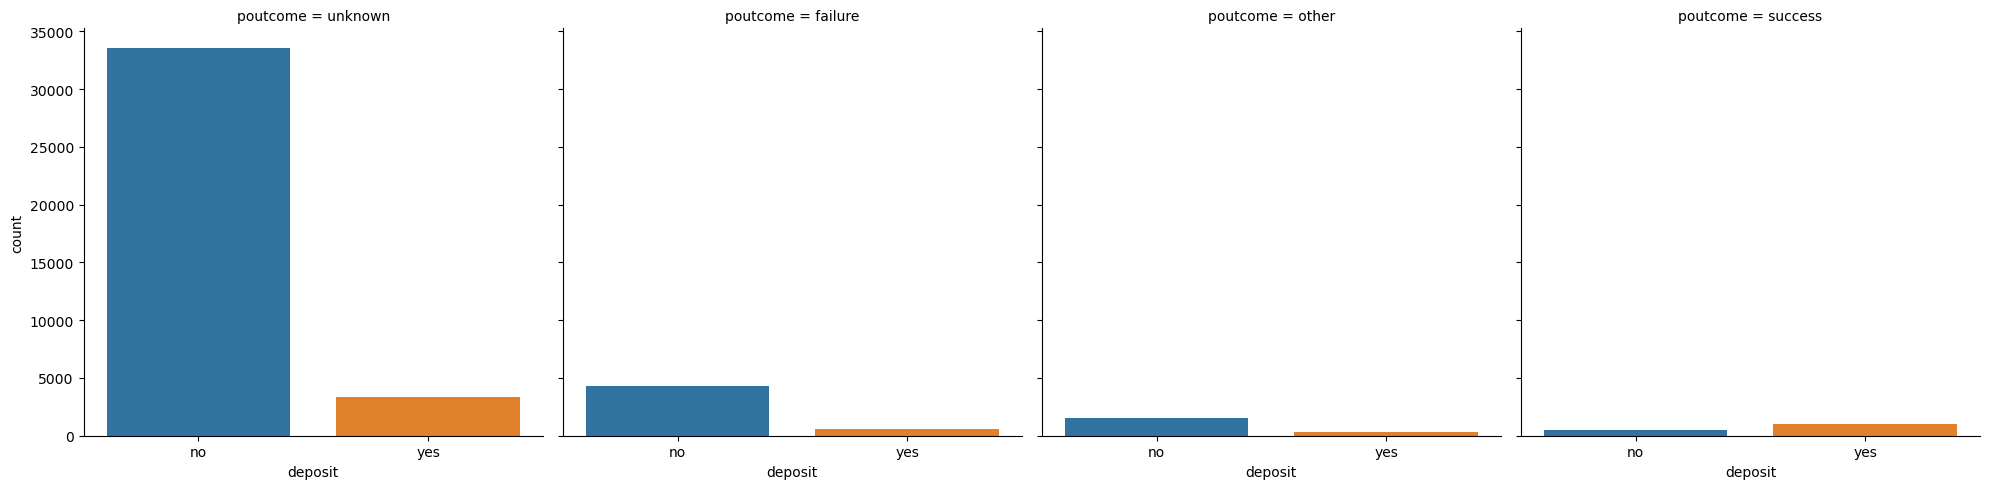

In [13]:
#exploring the relationship between the categorical data and label 'deposit' the dependant variable

for cat_feature in cat_features:
    sns.catplot(x='deposit',col= cat_feature,kind = 'count', data=df)
plt.show()

In [14]:
#check the target label split over categorical data and find the count
for cat_feature in cat_features:
    print (df.groupby(['deposit',cat_feature]).size())


deposit  job          
no       admin.           4540
         blue-collar      9024
         entrepreneur     1364
         housemaid        1131
         management       8157
         retired          1748
         self-employed    1392
         services         3785
         student           669
         technician       6757
         unemployed       1101
         unknown           254
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     4585
         married     24459
         single      10878
yes      divorced      622
         married      2755
         single       1912
dtype: int64
deposit  education
no      

######  Observation

* From the dataset retired customers are interest in bank deposit
* The month of May records high number with low ratio of interest in deposit 
* Customers with a housing loan to be uninterested in making a bank deposit
* Campaign outcome with poutcome = success have high tendency of making deposit
* March , September, October, and December customers showed much interest on deposit

In [15]:
#detine the numerical features
num_features = [col for col in df.columns if ((df[col].dtypes != 'object') and (col != 'deposit'))]
print('Number of numerical variables:', len(num_features))
df[num_features].head()


Number of numerical variables: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [16]:
#Find the discrete feature

discrete_feature= [col for col in num_features if len (df[col].unique ())<25]
print ("Discrete variables count:{}".format(len (discrete_feature)))

Discrete variables count:0


In [17]:
#Find continous nemerical features
continuous_features = [col for col in num_features if col not in discrete_feature+  ['deposit']]
print ("Continuous_features count:{}".format(len (discrete_feature)))

Continuous_features count:0


######  Observation
From the dataset there are 7 continuous numerical features

##### Distribution of Continuous features

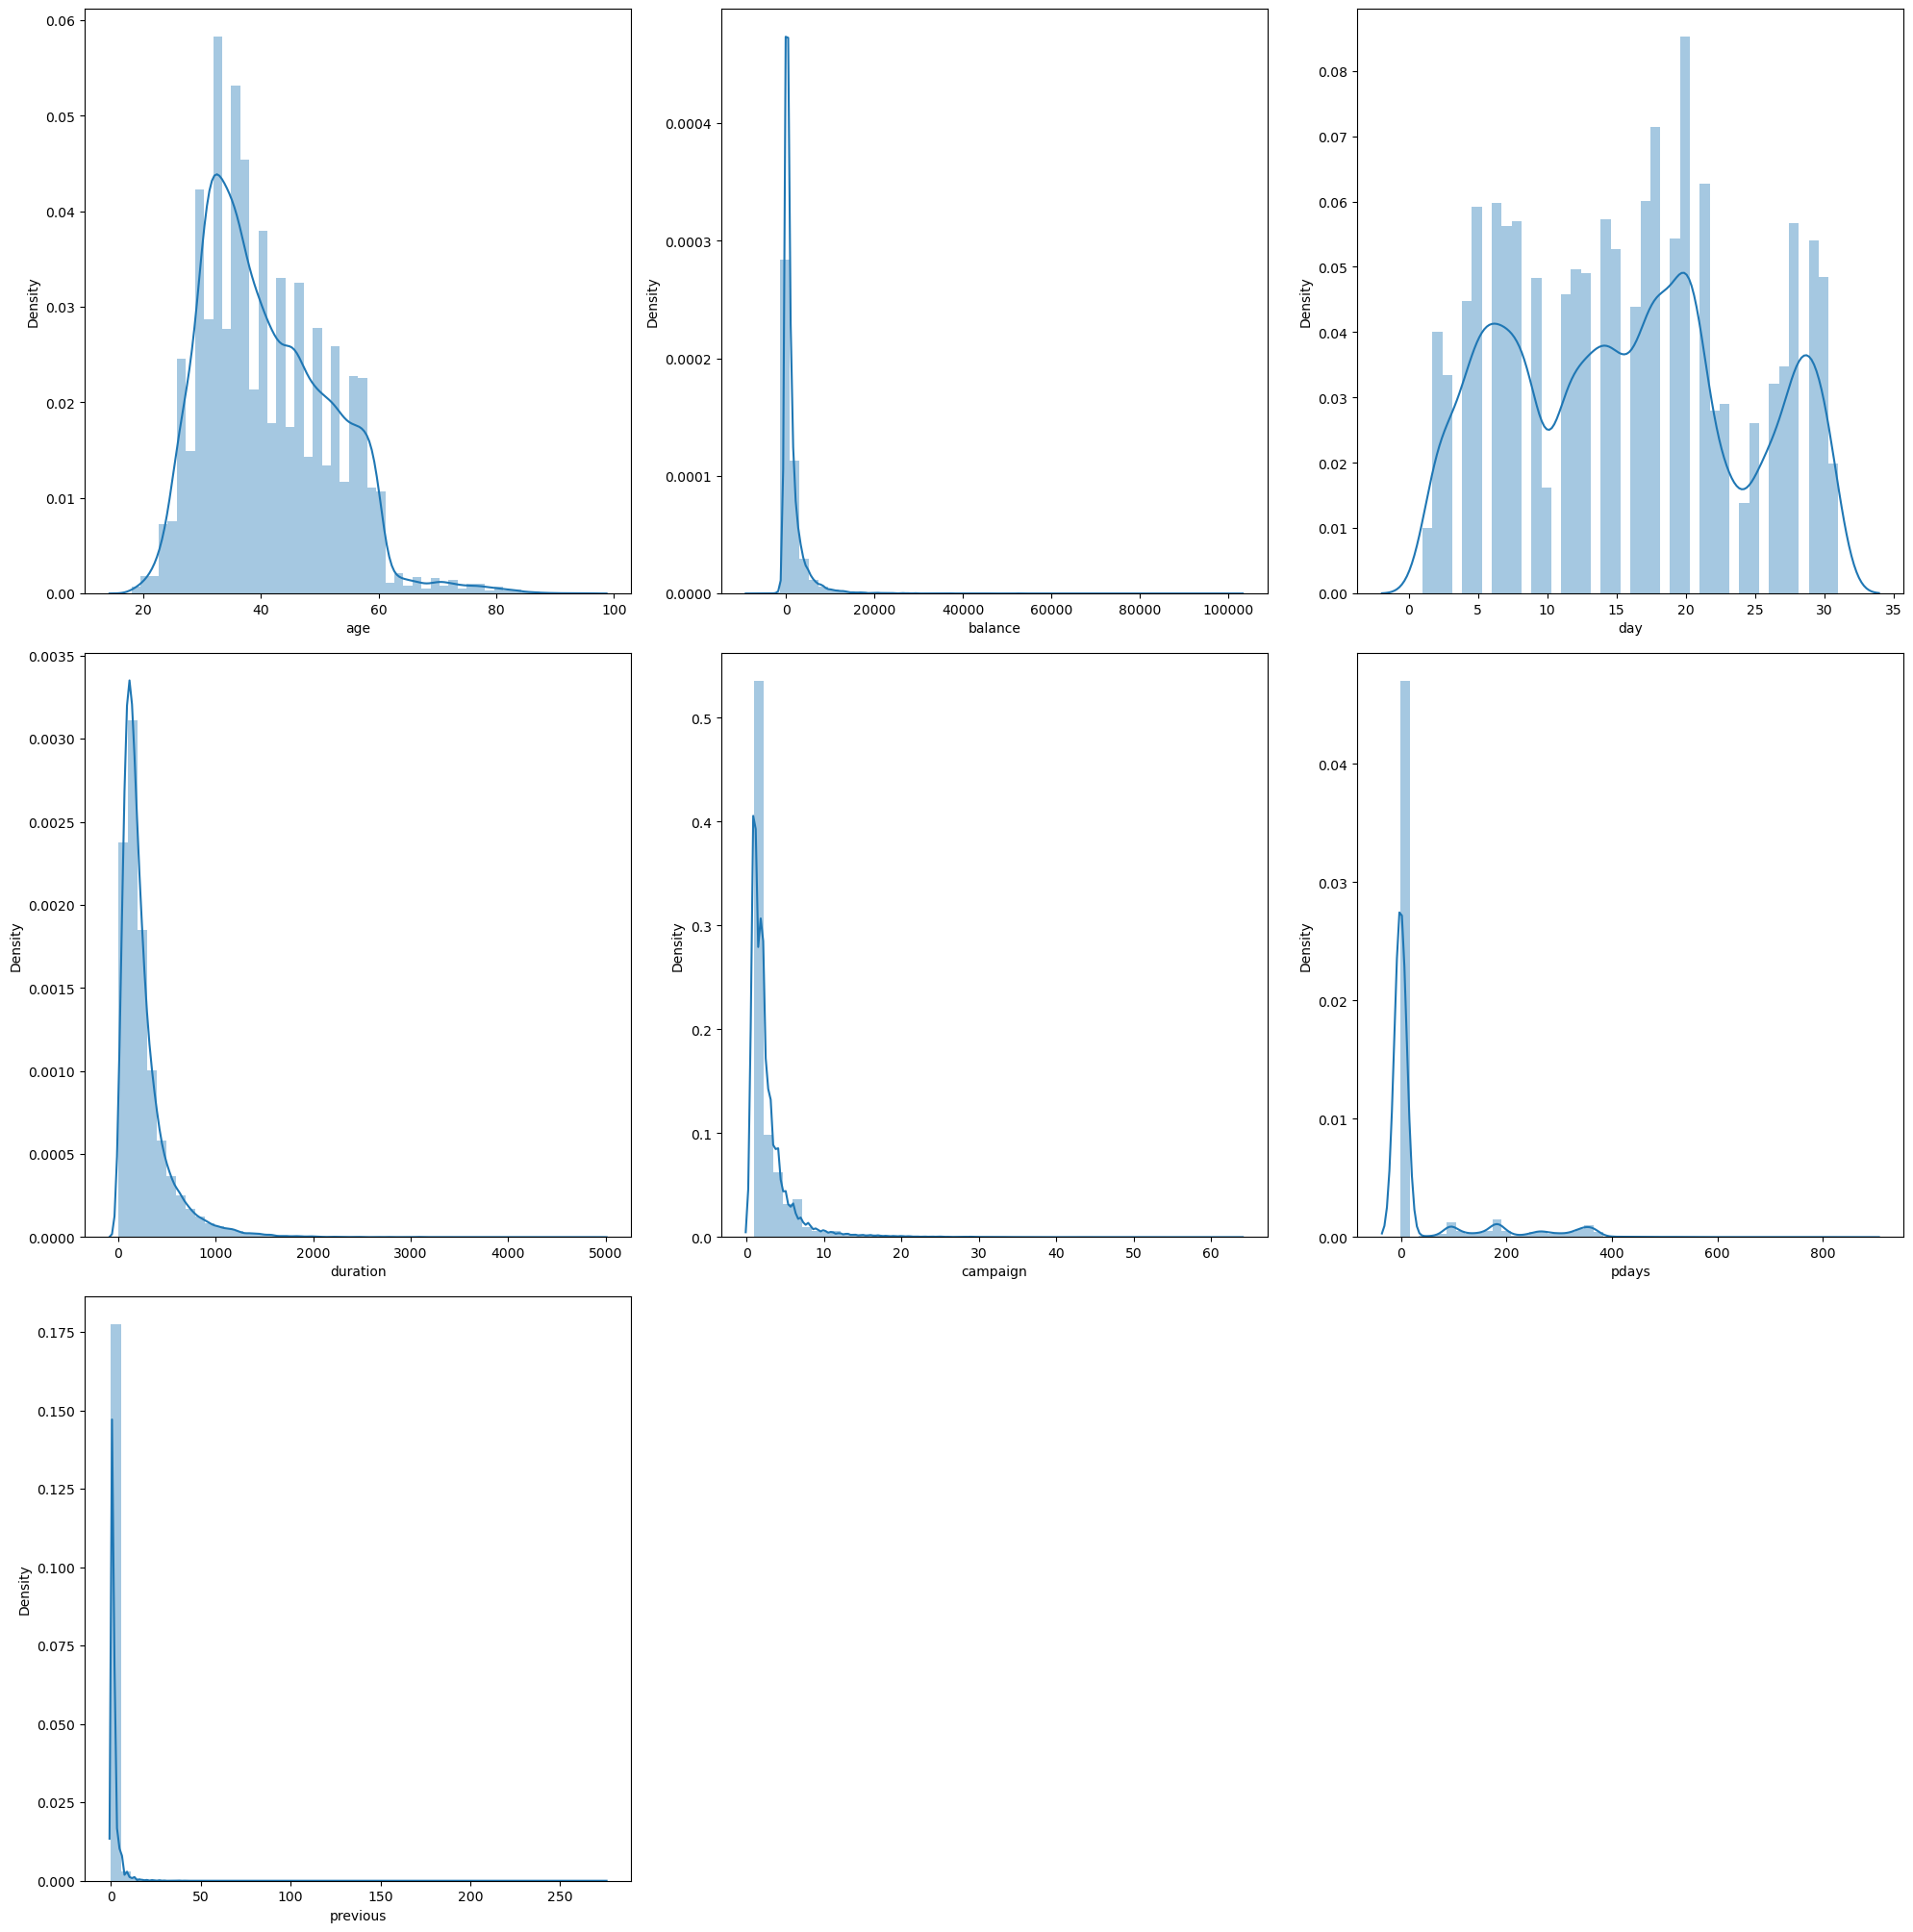

In [18]:
#Plot univariate distribution of continuous features

plt.figure(figsize=(20, 80), facecolor='white')
plotnumber = 1

for continuous_feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber += 1

plt.tight_layout()
plt.show()

######  Observation

* The dataset indicate that balance,campaign, pdays, and previous highly skewed towards the left hand and shows a number of outliers
* Age and days are normally distributed 

### b. Multivariate Analysis

##### Relationship between continuous numerical features and label

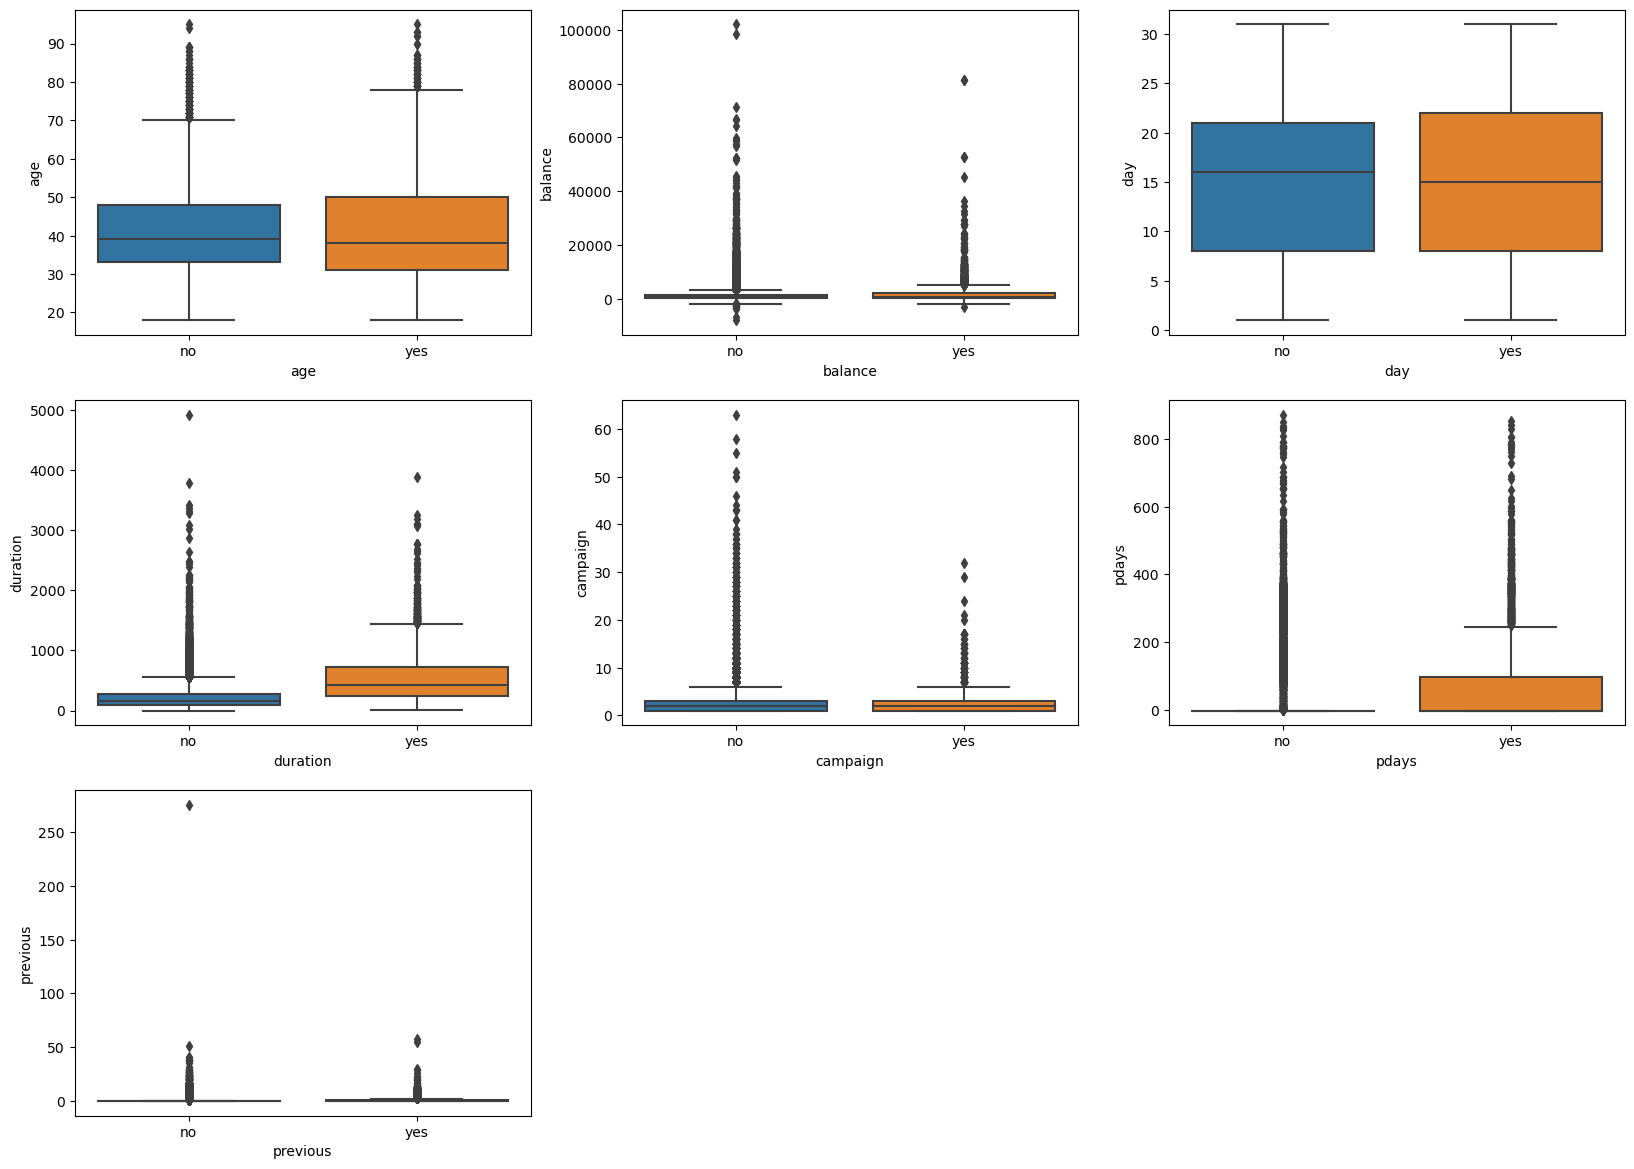

In [19]:
#boxplot to show target 'deposit' distribution with respect to numerical features

plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for col in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(x="deposit", y=df[col], data=df)
    plt.xlabel(col)
    plotnumber += 1

plt.show()

######  Observation

* Long days engagement and communication shows that customers indicate interest on deposit

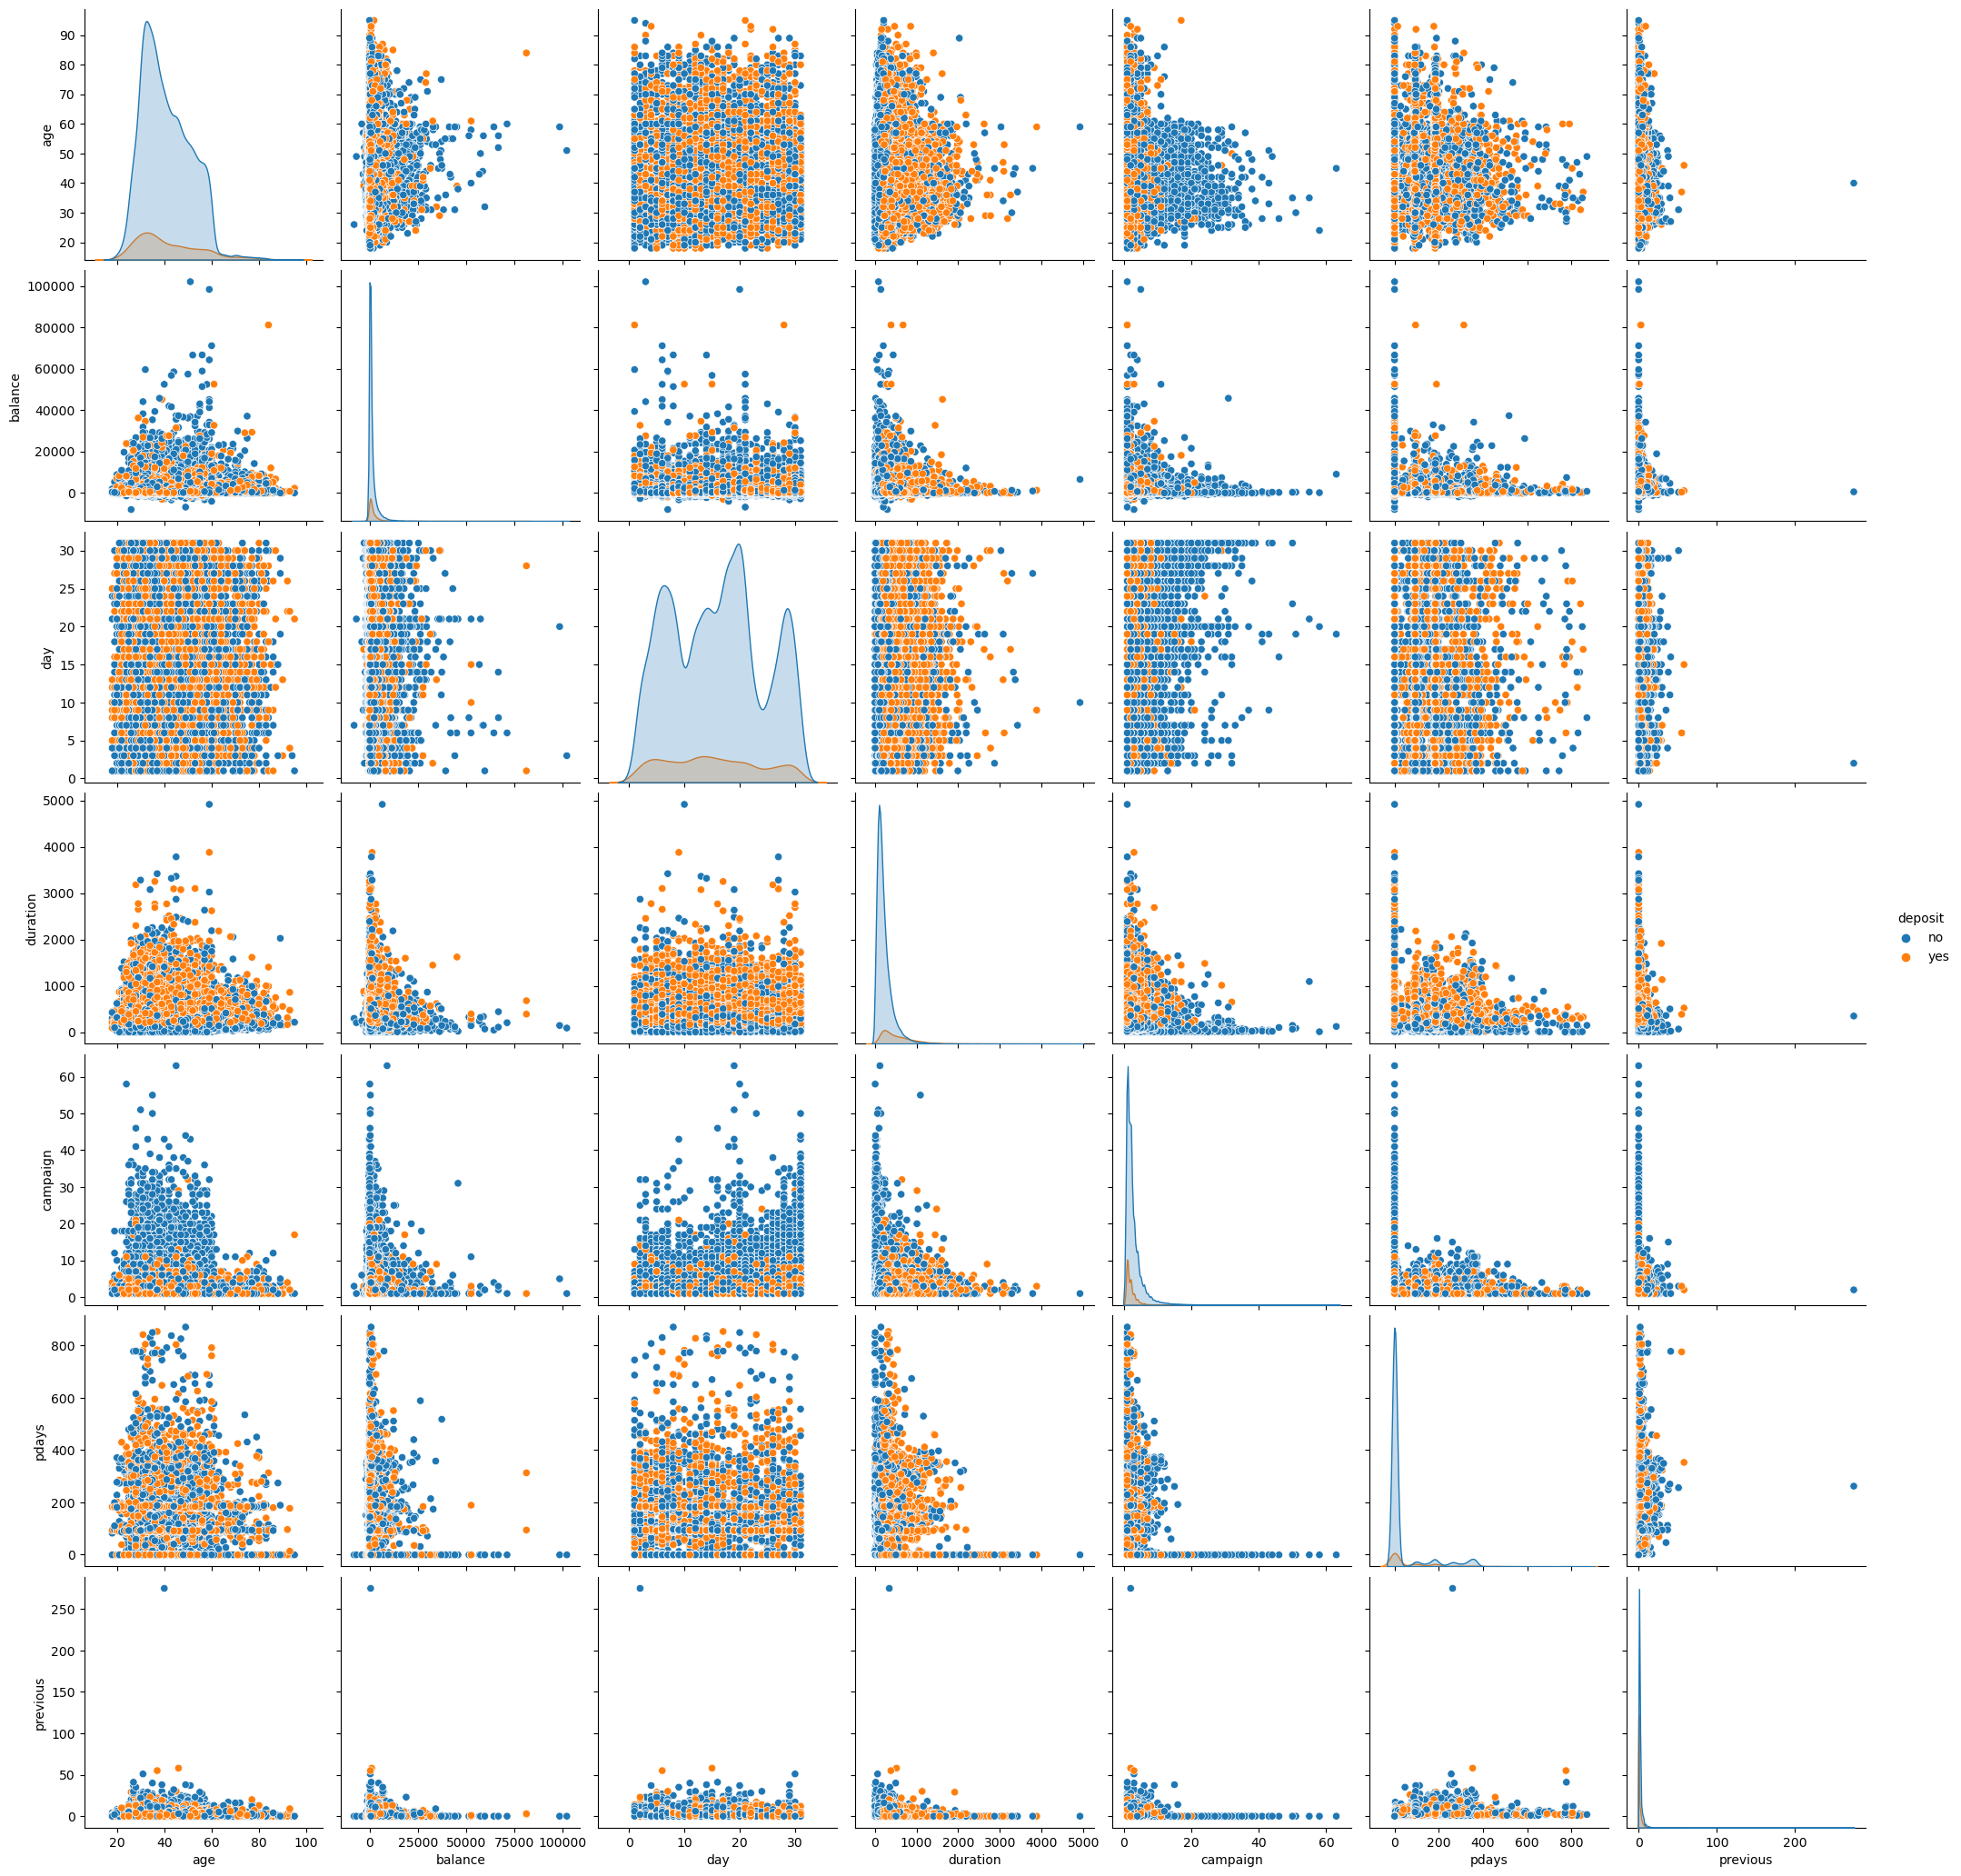

In [20]:
sns.pairplot(df, hue='deposit', height=3);

##### Find outliers in numerical features

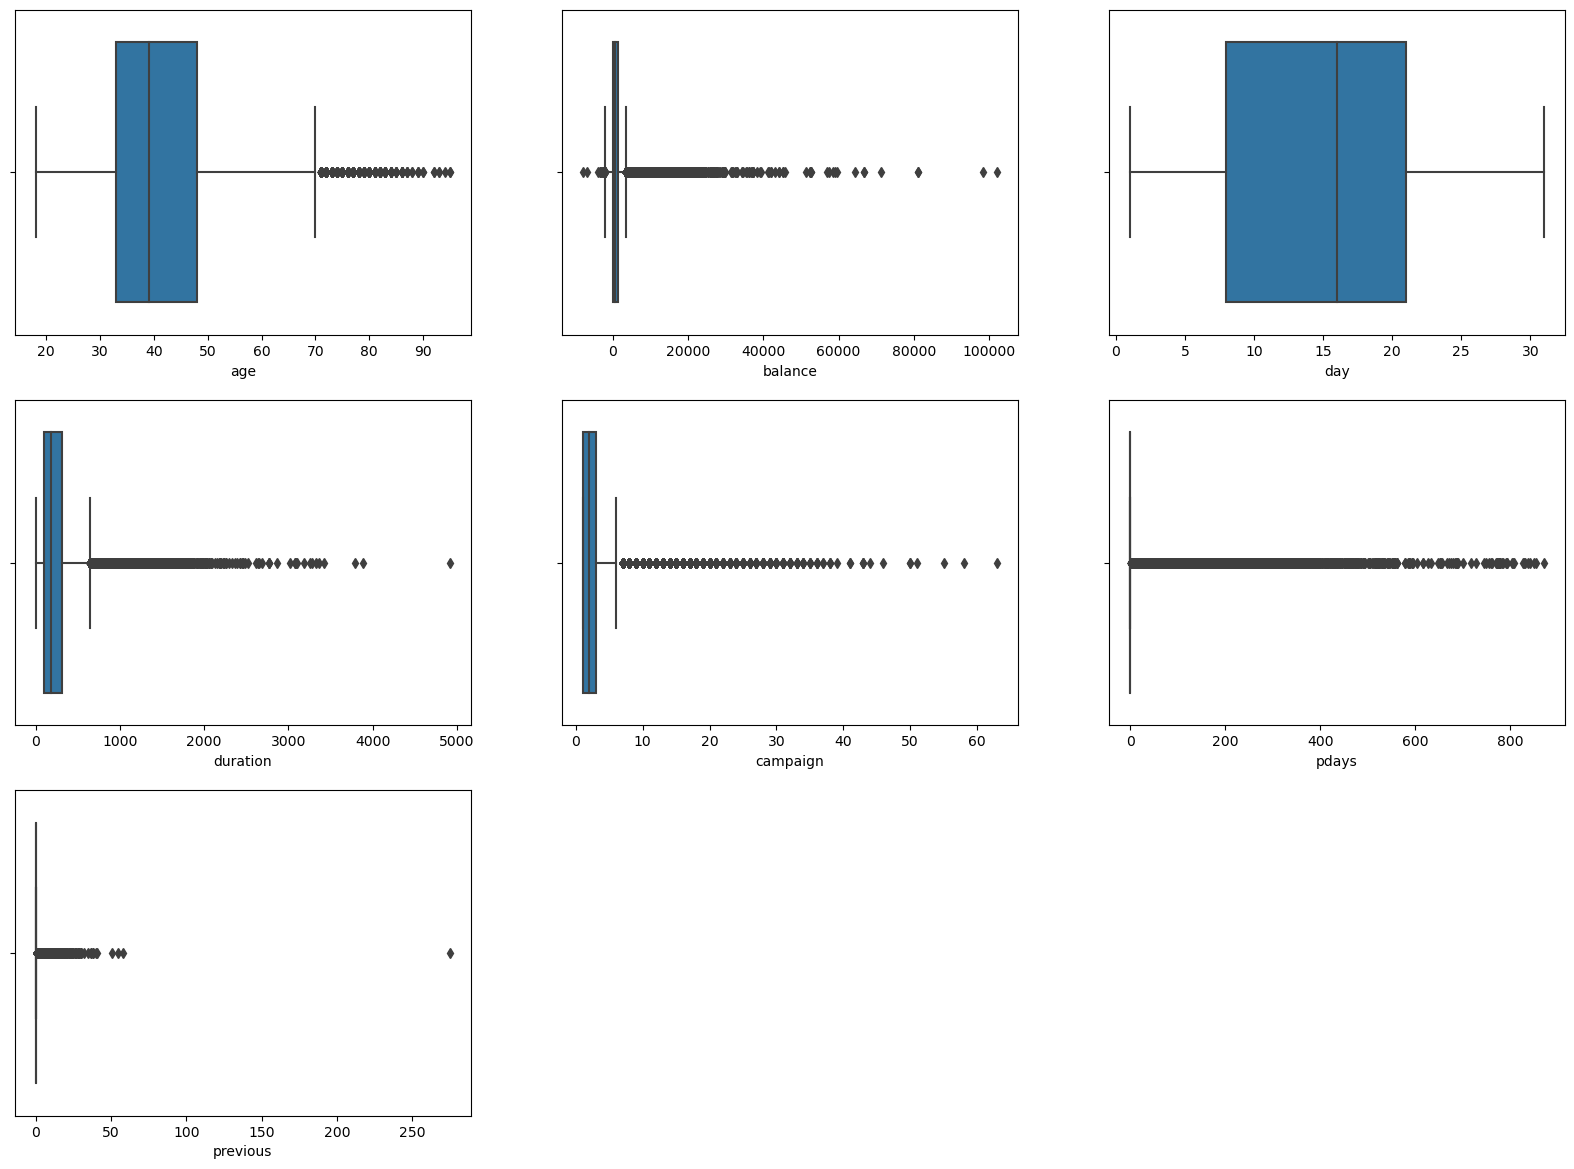

In [21]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20, 60), facecolor='white')
plotnumber = 1

for num_feature in num_features :
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(df[num_feature])
    plt.xlabel(num_feature)
    plotnumber += 1

plt.show()

######  Observation

* Previous, campaign, age, duration, pdays, and balance shows an outlier in the dataset

## 3. Explore the correlation between numerical features

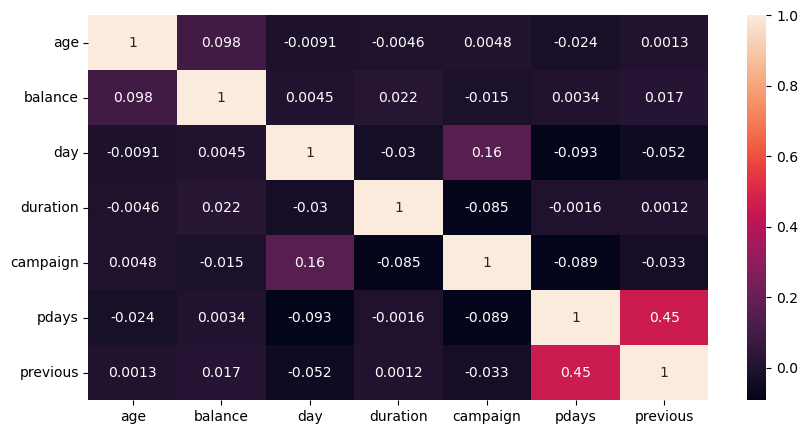

In [22]:
corr = df.corr()
fig = plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
plt.show()

######  Observation

* There is no significant correlation observed among the variables in the dataset.


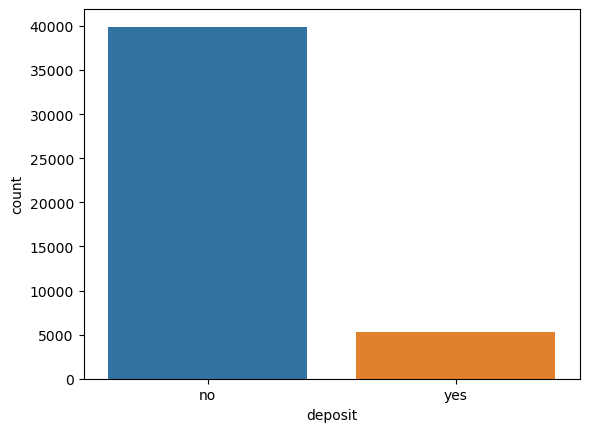

deposit
no     39922
yes     5289
Name: deposit, dtype: int64

In [23]:
#check if the dataset is balanced or not based on target values in classification

sns.countplot(x='deposit',data=df)
plt.show()

df['deposit'].groupby(df['deposit']).count()

######  Observation

* The dataset shows to be balanced 

## 4. Feature Engineering

In [24]:
df2 = df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [25]:
df2.shape

(45211, 17)

##### Drop unwanted features

In [26]:
#deposit against default

df2.groupby(['deposit','default']).size()


deposit  default
no       no         39159
         yes          763
yes      no          5237
         yes           52
dtype: int64

In [27]:
#Drop default features because it does not play any significant role

df2.drop (['default'],axis=1,inplace =True)


In [28]:
# deposit against pdays features 
df2.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       33570
          1           9
          2          35
          3           1
          4           1
                  ...  
yes       804         1
          805         1
          828         1
          842         1
          854         1
Length: 914, dtype: int64

In [29]:
#drop pdays features as it has -1 value for around 40x

df2.drop(['pdays'],axis =1, inplace=True)

##### Remove Outliers

In [30]:
#deposit against balance
df2.groupby(['deposit','balance'],sort=True)['balance'].count()

deposit  balance
no       -8019      1
         -6847      1
         -4057      1
         -3372      1
         -3313      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 9258, dtype: int64

##### Observation
From the dataset the balance feature should not be removed as balance goes high the customers shows interest on deposit

In [31]:
#deposit against duration

df2.groupby (['deposit','duration'],sort=True) ['duration'].count()

deposit  duration
no       0            3
         1            2
         2            3
         3            4
         4           15
                     ..
yes      3094         1
         3102         1
         3183         1
         3253         1
         3881         1
Name: duration, Length: 2627, dtype: int64

##### Observation
From the dataset the duration feature should not be removed as duration goes high the customers shows interest on deposit

In [32]:
#deposit against age
df2.groupby('age',sort=True) ['age'].count()

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

##### Observation
The outlier can be ignored, the age of the customers lies between 18 and 95

In [33]:
#deposit againt campaign
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
                     ...  
yes      20              1
         21              1
         24              1
         29              1
         32              1
Name: campaign, Length: 70, dtype: int64

In [34]:
#remove the outlier in campaign

df3 = df2[df2['campaign'] < 33]
df3 = df3.groupby(['deposit', 'campaign'], sort=True)['campaign'].count()
df3

deposit  campaign
no       1           14983
         2           11104
         3            4903
         4            3205
         5            1625
         6            1199
         7             688
         8             508
         9             306
         10            252
         11            185
         12            151
         13            127
         14             89
         15             80
         16             77
         17             63
         18             51
         19             44
         20             42
         21             34
         22             23
         23             22
         24             19
         25             22
         26             13
         27             10
         28             16
         29             15
         30              8
         31             12
         32              8
yes      1            2561
         2            1401
         3             618
         4             317
         5

## 5. Model Building

##### Label encoding

In [35]:
#Convert the object dataset to numeric

from sklearn.preprocessing import LabelEncoder
data = LabelEncoder()  # Method initiation

# Looping for columns
for r in df2.columns:
    if df2[r].dtype == 'object':
        df2[r] = data.fit_transform(df2[r])

df2.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,4,1,2,2143,1,0,2,5,8,261,1,0,3,0
1,44,9,2,1,29,1,0,2,5,8,151,1,0,3,0
2,33,2,1,1,2,1,1,2,5,8,76,1,0,3,0
3,47,1,1,3,1506,1,0,2,5,8,92,1,0,3,0
4,33,11,2,3,1,0,0,2,5,8,198,1,0,3,0


#### Scale the dataset

In [36]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scale_numeric (df2,columns):
    scaler = MinMaxScaler()
    df2[columns] =scaler.fit_transform (df2[columns])
    return df2
#choose columns to be scaled

scaled_columns = ['duration', 'balance']

#carryout min_max scaling 

scaled_1 = min_max_scale_numeric (df2, scaled_columns)

#print scaled_1

scaled_1.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,58,4,1,2,0.092259,1,0,2,5,8,0.053070,1,0,3,0
1,44,9,2,1,0.073067,1,0,2,5,8,0.030704,1,0,3,0
2,33,2,1,1,0.072822,1,1,2,5,8,0.015453,1,0,3,0
3,47,1,1,3,0.086476,1,0,2,5,8,0.018707,1,0,3,0
4,33,11,2,3,0.072812,0,0,2,5,8,0.040260,1,0,3,0


##### Data training set and Test set

In [37]:
X=df2[['balance','loan']]#idenpendent variables
y=df2['deposit']#depedent variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)#test set is 20%

In [38]:
len (X_train)

36168

In [39]:
len (X_test)

9043

In [40]:
#Customer Segmentation with age, job, marital, education, balance, housing, loan, duration, deposit

df3=df2[['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
         'duration', 'deposit']]

## 6. Finding the Optimal Number of Clusters with the Elbow Method

In [41]:
sum_of_sqr_dist = {}

for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df3)
    sum_of_sqr_dist[k] = km.inertia_

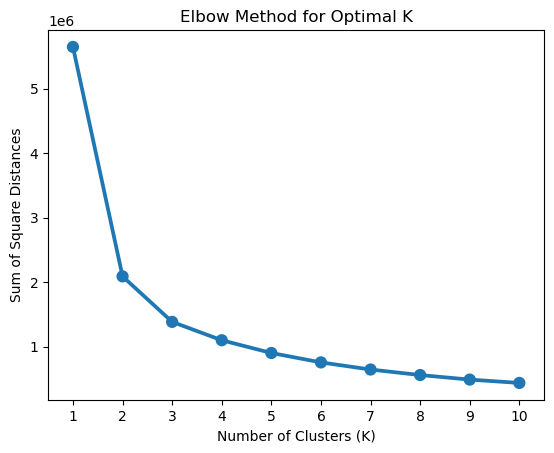

In [42]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

## 7.  K-Means Clustering

In [43]:
#model fitting

Model = KMeans(n_clusters=4,
             init='k-means++',
             max_iter=100)
Model.fit(df3)

KMeans(max_iter=100, n_clusters=4)

In [44]:
print("Labels", Model.labels_)

Labels [3 1 2 ... 3 3 0]


In [45]:
#determine the centroids

print("Centroids", Model.cluster_centers_)

Centroids [[3.81962030e+01 4.03639964e+00 1.13419381e+00 1.24482688e+00
  8.42780595e-02 6.35798675e-01 1.54408250e-01 5.23111710e-02
  9.86136721e-02]
 [4.85557689e+01 4.06079722e+00 9.34174438e-01 1.14929603e+00
  8.58649497e-02 5.22124703e-01 1.80288901e-01 4.98540482e-02
  9.00530261e-02]
 [2.97807234e+01 4.76597908e+00 1.51910227e+00 1.31689425e+00
  8.29939679e-02 6.01539802e-01 1.61025567e-01 5.39700891e-02
  1.34151656e-01]
 [5.97639031e+01 4.61702491e+00 8.61992494e-01 1.09945411e+00
  9.12217343e-02 3.11668373e-01 1.35448652e-01 5.44059734e-02
  1.72807915e-01]]


In [46]:
centroids = Model.cluster_centers_

In [47]:
#call up the clusters

df3_cluster = df3.copy()
df3_cluster["Cluster"] = Model.fit_predict(df3)
df3_cluster.head()

,age,job,marital,education,balance,housing,loan,duration,deposit,Cluster
0,58,4,1,2,0.092259,1,0,0.053070,0,2
1,44,9,2,1,0.073067,1,0,0.030704,0,0
2,33,2,1,1,0.072822,1,1,0.015453,0,3
3,47,1,1,3,0.086476,1,0,0.018707,0,0
4,33,11,2,3,0.072812,0,0,0.040260,0,3


## 8.  Visualize the clusters

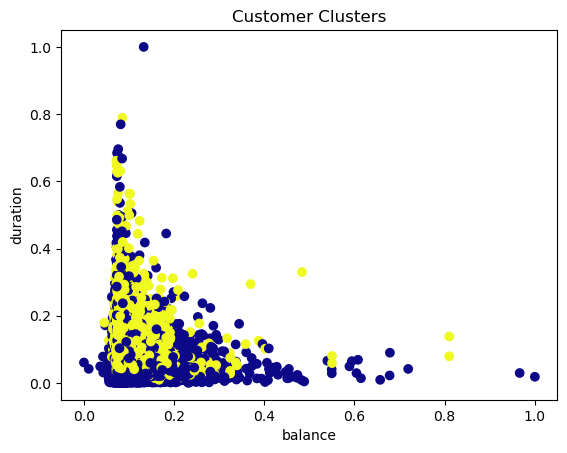

In [48]:
plt.scatter (scaled_1['balance'], scaled_1['duration'], c=scaled_1 ['deposit'],cmap= 'plasma')
plt.xlabel("balance")
plt.ylabel("duration")
plt.title ('Customer Clusters')
plt.show()

In [49]:
labels = Model.labels_

## 9.  Evaluation with Silhouette Score

In [50]:
#calculate the silhoute score

silhouette_score(df3, labels)

0.3402154170673567

In [ ]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    km.fit(df3)
    silhouette[k] = silhouette_score(df3, km.labels_)

#Visualize the silhoutte Scores

sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")

##### Observation 

* From the silhouette score analysis it shows that the best and optimal cluster for the customer segmentation is k=4

## 10. Customer  Segmentation with 3 Features

In [ ]:
df4= df3.copy()

In [ ]:
#explore k=5

#Determine the optimal number of cluster

sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100)
    km = km.fit(df4)
    sum_of_sqr_dist[k] = km.inertia_

In [ ]:
#Visualize the elbow optimal cluster

sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

##### Observation

* The inertia started decreasing significantly at K= 4

In [ ]:
Model2 = KMeans(n_clusters=5, init='k-means++', max_iter=100)
Model2.fit(df4)

In [ ]:
df4['Cluster'] = Model2.fit_predict(df4)
df4.head()

#### 3D Customer cluster visualization

In [ ]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py

df4['labels'] = labels

trace = go.Scatter3d(
    x=df4['duration'],
    y=df4['balance'],
    z=df4['age'],
    mode='markers',
    marker=dict(
        color=df4['labels'],
        size=5,
        line=dict(color=df4['labels'], width=12),
        opacity=0.8
    )
)

data = [trace]
layout = go.Layout(
    title='3D Customer Clustering',
    scene=dict(
        xaxis=dict(title='duration'),
        yaxis=dict(title='balance'),
        zaxis=dict(title='age')
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [ ]:
# Step 1: Calculate cluster-level statistics
cluster_stats = df3_cluster.groupby("Cluster").agg({
    "age": "mean",  
    "duration": "sum",    
    "balance": "mean",
    "deposit": "mean" 
    
}).reset_index()

# Step 2: Identify the most profitable cluster
profitable_cluster = cluster_stats.loc[cluster_stats["age"].idxmax()]
# Replace "column1" with the metric you want to use for profitability

# Step 3: Analyze cluster characteristics
selected_cluster = profitable_cluster["Cluster"]
cluster_data = df3_cluster[df3_cluster["Cluster"] == selected_cluster]
# Explore and analyze the data in the selected cluster

# Print the profitable cluster details and cluster-level statistics

print("Profitable Cluster:", selected_cluster)
print("Cluster Statistics:")
print(cluster_stats)

## SUMMARY:

### Key Insights for Customer Segmentation and Deposit Marketing Strategy

##### Target Audience: Retired Customers

* Retired customers have shown a strong interest in bank deposits.

##### Month of May: Low Conversion Ratio
* May records a high number of interactions but a low ratio of interest in deposits.
* Investigate reasons behind this trend and consider campaign adjustments for May.

##### Impact of Housing Loans

* Customers with housing loans are generally uninterested in making bank deposits.
* Develop targeted strategies to address concerns and promote deposit offerings to this customer segment.

##### Successful Campaign Outcomes

* Campaign outcomes marked as "success" have a higher tendency to result in deposits.
* Prioritize and replicate successful campaign strategies to increase overall deposit conversion rates.

##### Seasonal Patterns of Interest

* Customers exhibit greater interest in deposits during March, September, October, and December.
* Leverage these months for targeted marketing campaigns and promotional offers.

##### Understanding Customer Data

* The dataset includes 7 continuous numerical features.
* Certain features, such as balance, campaign, pdays, and previous, are skewed and contain outliers.

##### Normal Distribution and Outliers

* Age and days follow a normal distribution, while other features have outliers.


##### Dataset Balance

* The dataset exhibits balance between positive and negative responses for deposits.
* Ensure equal representation of both deposit and non-deposit customers in future analysis and campaigns.

##### Optimal Customer Segmentation

* Silhouette score analysis show the optimal number of clusters for customer segmentation is k=4 with silhouette score of 0.3444014756318102.
* Utilize these segments to tailor marketing messages and strategies to specific customer groups.

##### No Correlation Between Variables

* There is no significant correlation observed among the variables in the dataset.
* Rely on other factors and insights to drive deposit marketing strategies rather than relying on inter-variable relationships.

These key insights provide actionable information to improve deposit conversion rates and develop targeted marketing strategies. By understanding customer behavior, seasonality, and campaign outcomes, the bank can enhance its marketing efforts and drive customer engagement and deposit growth.